## Importando bibliotecas necessárias

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request


## Link da imagem (você pode alterar para qualquer outro link direto para imagem)


In [5]:
url = 'https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg' # Exemplo de URL de imagem direta

## Baixando a imagem a partir do link


In [8]:
req = urllib.request.Request(
    url,
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
)
resp = urllib.request.urlopen(req)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)

## Convertendo para escala de cinza

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


## Aplicando filtro de Sobel nas direções X e Y

In [10]:
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

## Combinando os gradientes

In [11]:
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

## Plotando imagem original e filtrada

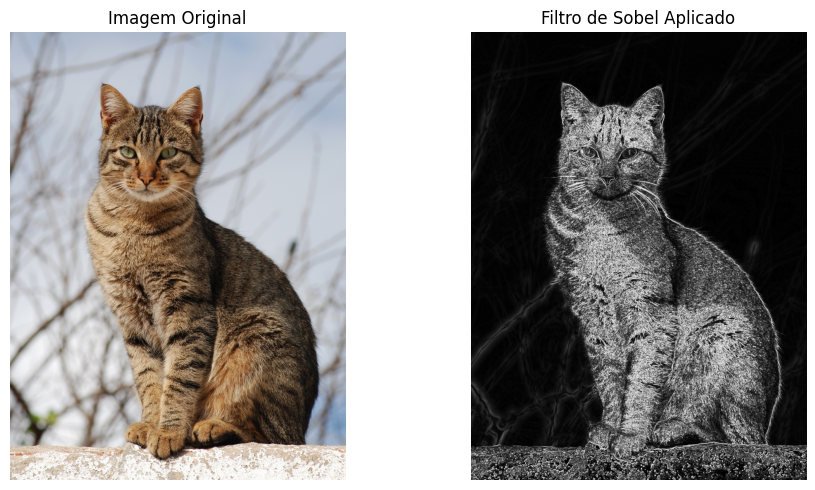

In [12]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Filtro de Sobel Aplicado')
plt.axis('off')

plt.tight_layout()
plt.show()